# Ames Housing

## 0. Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import os
import seaborn as sns 
import missingno as msno
import sklearn

# SKlearn imports:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNetCV, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn import set_config
from sklearn.feature_selection import RFE, SelectKBest, f_regression

from statsmodels.stats.outliers_influence import variance_inflation_factor

## 1. Load in Data

In [2]:
ames = pd.read_csv('../datasets/train.csv')
ames_test = pd.read_csv('../datasets/test.csv')

## 2. Preview and Inspect the Data

Use basic methods to inspect:

In [3]:
ames.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [4]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
ames.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [6]:
ames['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [7]:
ames['SalePrice'].median()

162500.0

In [8]:
ames['SalePrice'].mode()

0    130000
dtype: int64

In [9]:
# display max number of rows
pd.set_option('display.max_rows',None)

In [10]:
# how many unique values in each feature
ames.nunique()

Id                 2051
PID                2051
MS SubClass          16
MS Zoning             7
Lot Frontage        118
Lot Area           1476
Street                2
Alley                 2
Lot Shape             4
Land Contour          4
Utilities             3
Lot Config            5
Land Slope            3
Neighborhood         28
Condition 1           9
Condition 2           8
Bldg Type             5
House Style           8
Overall Qual         10
Overall Cond          9
Year Built          113
Year Remod/Add       61
Roof Style            6
Roof Matl             6
Exterior 1st         15
Exterior 2nd         15
Mas Vnr Type          4
Mas Vnr Area        373
Exter Qual            4
Exter Cond            5
Foundation            6
Bsmt Qual             5
Bsmt Cond             5
Bsmt Exposure         4
BsmtFin Type 1        6
BsmtFin SF 1        821
BsmtFin Type 2        6
BsmtFin SF 2        205
Bsmt Unf SF         967
Total Bsmt SF       892
Heating               5
Heating QC      

Examine null values:

<AxesSubplot:>

<Figure size 1440x1440 with 0 Axes>

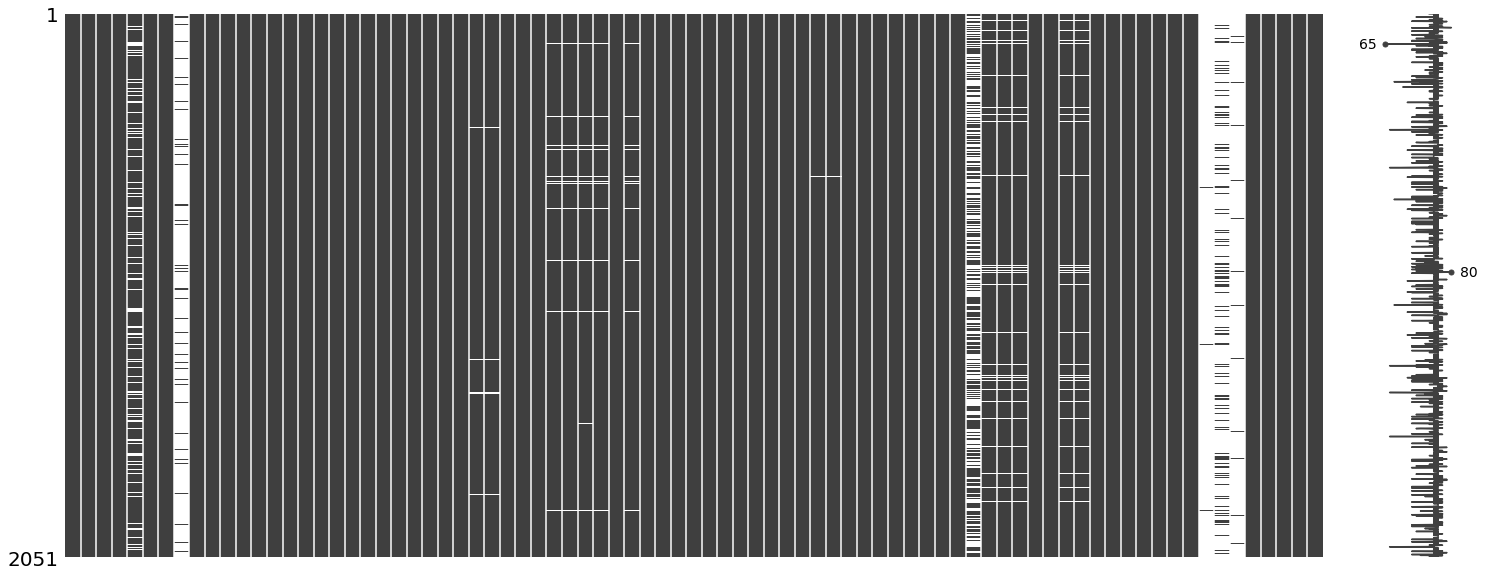

In [11]:
# missing value matrix
plt.figure(figsize=(20, 20))
msno.matrix(ames)

Clearly, there are a lot of missing values that we will need to replace later on in our cleaning.

<AxesSubplot:>

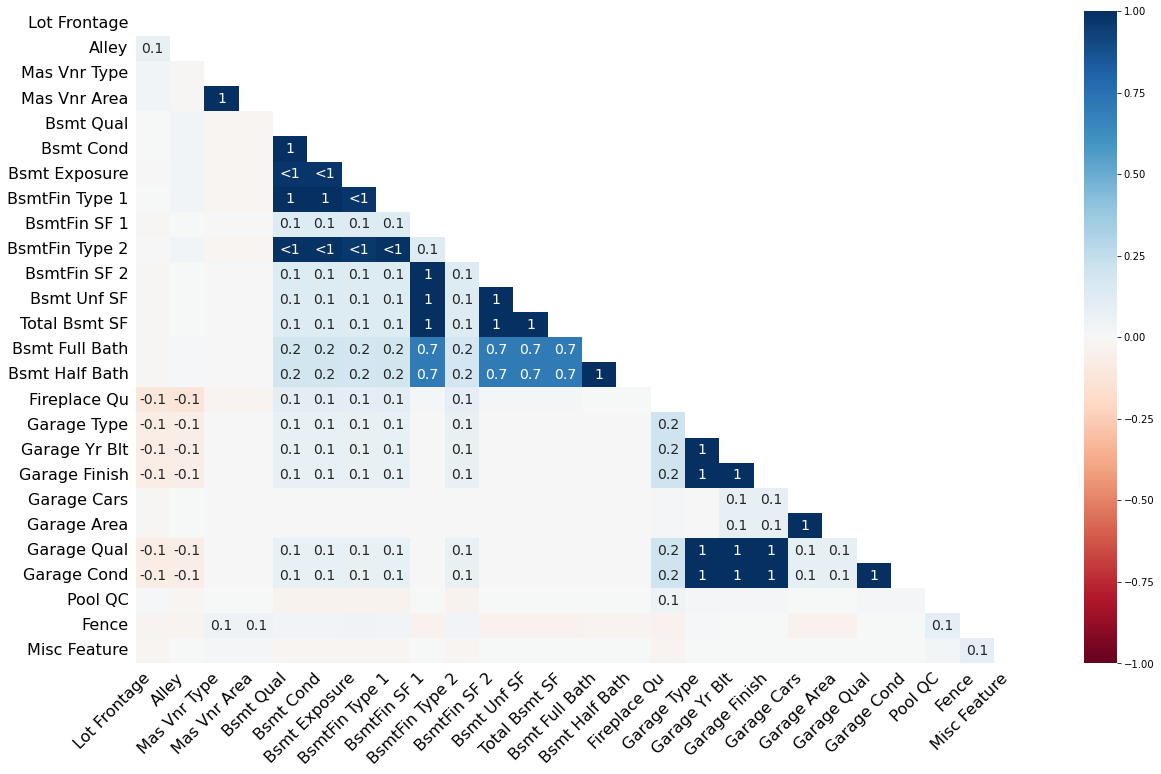

In [12]:
# missing value heatmap
msno.heatmap(ames)

In [13]:
# sort columns by number of missing of missing values in each column
ames.isnull().sum().sort_values(ascending=False).head(25)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
dtype: int64

This gives us a breakdown of how many missing values we have in each feature. As stated above, we will need to later replace these empty values with values that best suit the situation for that observation.

<AxesSubplot:>

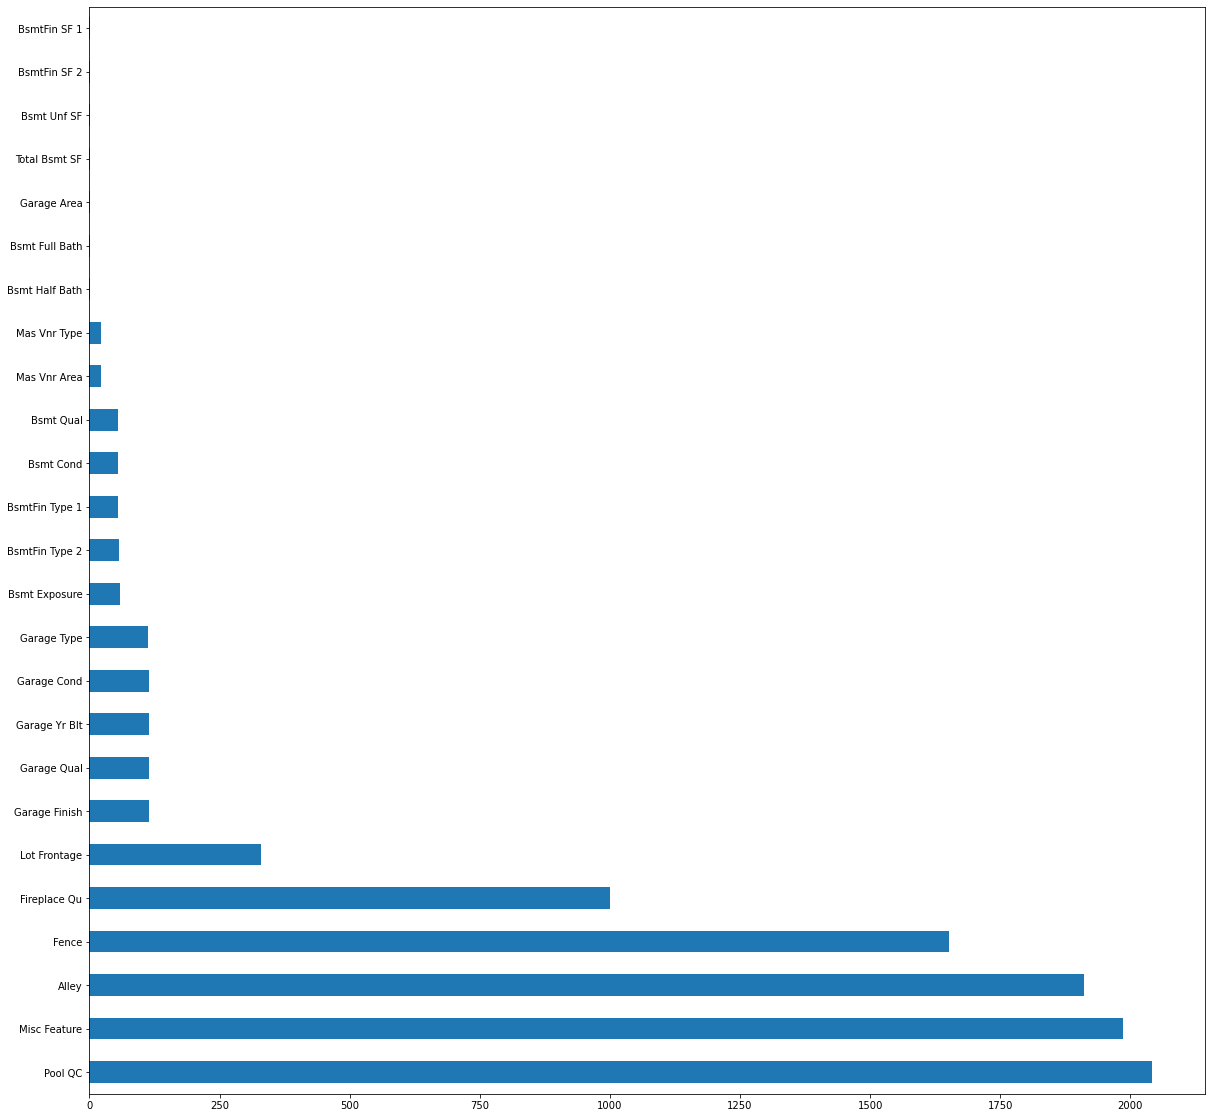

In [14]:
# display missing values from each column in bar chart
plt.figure(figsize=(20,20))
ames.isnull().sum().sort_values(ascending=False).head(25).plot(kind='barh')

This shows us a visual representation of how many missing values we have so we can easily compare it to the other feature's missing data.

## 3. Examine Features

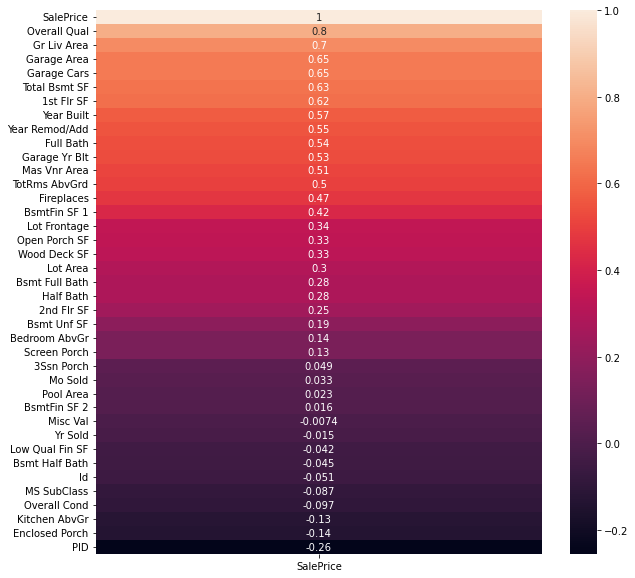

In [15]:
# heatmap of correlations of features in order
plt.figure(figsize=(10,10))
sns.heatmap(ames.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True);

From this heatmap, we can see that Overall Quality, Ground Living Area, and Garage Area are most positively correlated with price. This indicates that as these features increase, the price increases. 

In addition, we can see that Parcel Identification Number, Enclosed Porch, and Kitchen Above Ground are most negatively correlated with price, indicating that as these features change, the price goes down. 

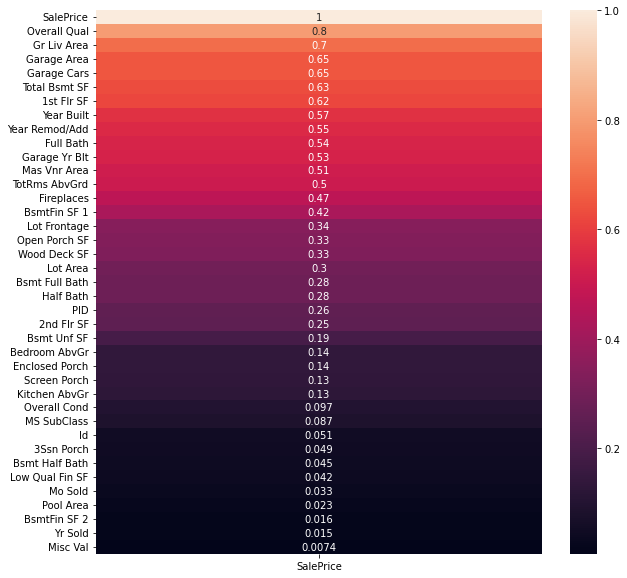

In [16]:
# heatmap of absolute value of correlations of features in order 
plt.figure(figsize=(10,10))
sns.heatmap(abs(ames.corr()[['SalePrice']]).sort_values(by='SalePrice', ascending=False), annot=True);

This heatmap shows us the positive correlations of each feature. The features at the top affect price the most, meanwhile the features at the bottom affect price the least. 

We can see that Overall Quality, Ground Living Area, and Garage Cars have the most impact on Sale Price. In contrast, Misc Val, Year Sold, and Basement Type 2 Finised Square Footage affect it the least.

Perhaps it would be a good idea to further inspect features that have a high correlation to price and eliminate features that don't.

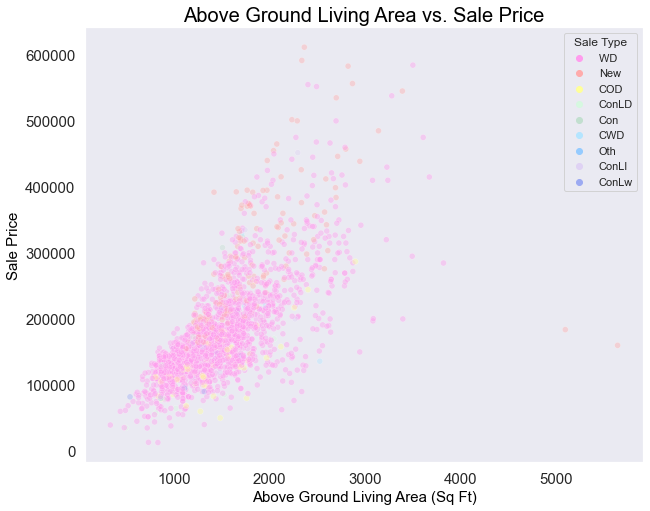

In [17]:
# create palatte for colors to be used in graph
palette = [ '#FF9CEE', '#FFABAB', '#ffff99', '#D6F8E0', '#C2DFCF','#B4E5FF','#95CBFF',  '#DFD2F4', '#9CAAF2']

# set style for seaborn graph
sns.set(style="dark",font_scale=1.0)

# scatterplot of Above Ground Living Area vs Sale Price with different colors representing Sale Type
plt.subplots(figsize=(10,8))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data = ames, alpha=0.4, hue = 'Sale Type', palette=palette)
plt.title('Above Ground Living Area vs. Sale Price', c = 'Black', fontdict={'fontsize':20})
plt.xlabel('Above Ground Living Area (Sq Ft)',  fontsize= 15, c = 'Black')
plt.ylabel('Sale Price',  fontsize= 15, c = 'Black');
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);

This chart shows us that as Ground Living Area increases, Sale Price increases as well. We can also see the relationship between these two features and Sale Type. It is apparent that Court Officer Deed/Estate sales have smaller Above Ground Living Area, but New sales appear to have more Above Ground Living Area and, therefore, higher Sale Prices. It is also appearent that Warranty Deed (Conventional) sales are spread throughout the two features and there is no clear pattern for this sale type. 

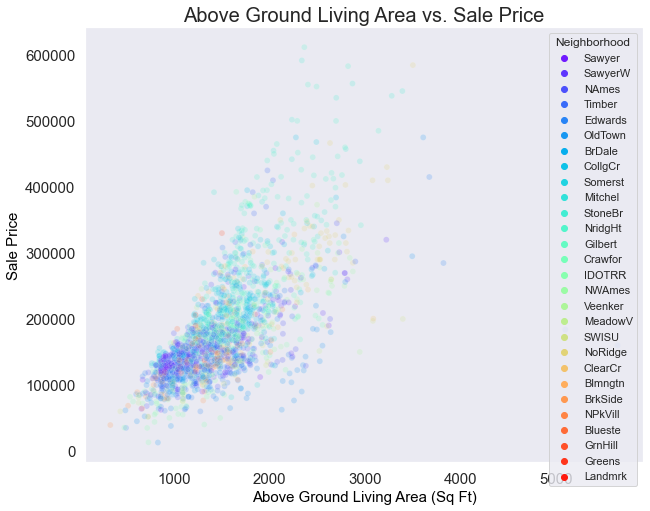

In [18]:
# scatterplot of Above Ground Living Area vs Sale Price with different colors representing Neighborhood
plt.subplots(figsize=(10,8))
sns.set(style="dark",font_scale=1.0)
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data = ames, hue = 'Neighborhood', alpha= 0.2, palette='rainbow')
plt.title('Above Ground Living Area vs. Sale Price', fontdict={'fontsize':20})
plt.xlabel('Above Ground Living Area (Sq Ft)', fontsize= 15, c = 'Black')
plt.ylabel('Sale Price', fontsize= 15, c = 'Black');
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);

This chart shows us that as Ground Living Area increases, Sale Price increases as well. We can also see the relationship between these two features and Neighborhood. It is apparent that homes located in Northridge Heightsv and Northridge appear to have more Above Ground Living Area and, therefore, higher Sale Prices. Homes in Meadow Village generally have less Above Ground Living Area and, therefore, lower Sale Prices. It would be a good idea to further analyze how prices vary throughout the various Neighborhoods. 

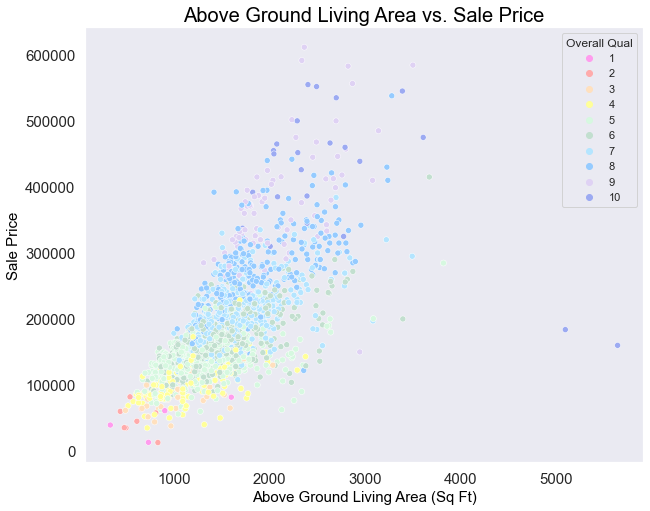

In [19]:
# create palatte for colors to be used in graph
palette = [ '#FF9CEE', '#FFABAB','#FFE0BE', '#ffff99', '#D6F8E0', '#C2DFCF','#B4E5FF','#95CBFF',  '#DFD2F4', '#9CAAF2']

# scatterplot of Above Ground Living Area vs Sale Price with different colors representing Overall Quality
plt.subplots(figsize=(10,8))
sns.set(style="dark",font_scale=1.0)
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data = ames, hue = 'Overall Qual', palette=palette)
plt.title('Above Ground Living Area vs. Sale Price', c = 'Black', fontdict={'fontsize':20})
plt.xlabel('Above Ground Living Area (Sq Ft)', fontsize= 15, c = 'Black')
plt.ylabel('Sale Price', fontsize= 15, c = 'Black');
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);

This chart shows a clear distinction and trend in Overall Quality with Above Ground Living Area and Sale Price. As expected, as the overall Quality increases the Above Ground Living Area and Sale Price increases as well. There is a distinct relationship between these 3 features.

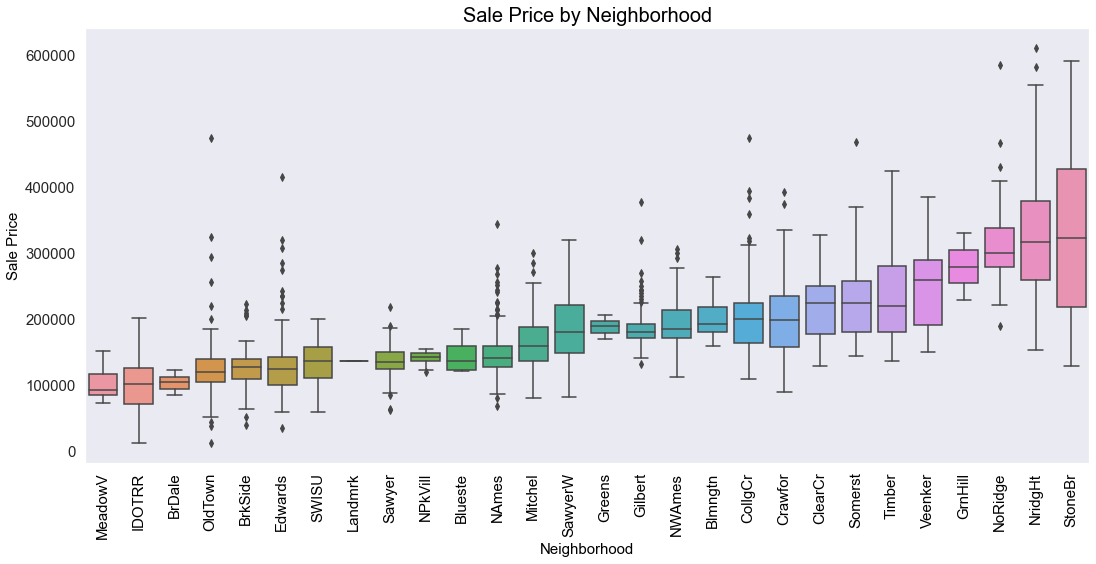

In [20]:
# citation: Intermediate Pandas Notebook

# series of Neighborhoods sorted by mean Sale Price
ames.groupby('Neighborhood')['SalePrice'].mean().sort_values()

# indexes of Neighborhood sorted by mean Sale Price
sorted_index_neigh = ames.groupby('Neighborhood')['SalePrice'].mean().sort_values().index

sns.set(style="dark",font_scale=1.0)
fig, ax = plt.subplots(figsize=(18, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data = ames, order=sorted_index_neigh, ax=ax)
plt.title('Sale Price by Neighborhood', c='black', fontdict={'fontsize':20});
plt.xticks(rotation=90, fontsize= 15, c='black');
plt.xlabel('Neighborhood', fontsize= 15, c = 'Black')
plt.ylabel('Sale Price', fontsize= 15, c='black');
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);

These boxplots give us a better idea at the distribution of housing prices in each Neighborhood. Meadow Village, Iowa Dot and Rail Road, and Briardale have their housing Sale Prices at around 100,000, meanwhile Northridge, Stone Brook, and Northridge Heights have their housing Sale Prices at around 250,000. It is very clear that Sale Prices vary according to the neighborhood they are located in. 

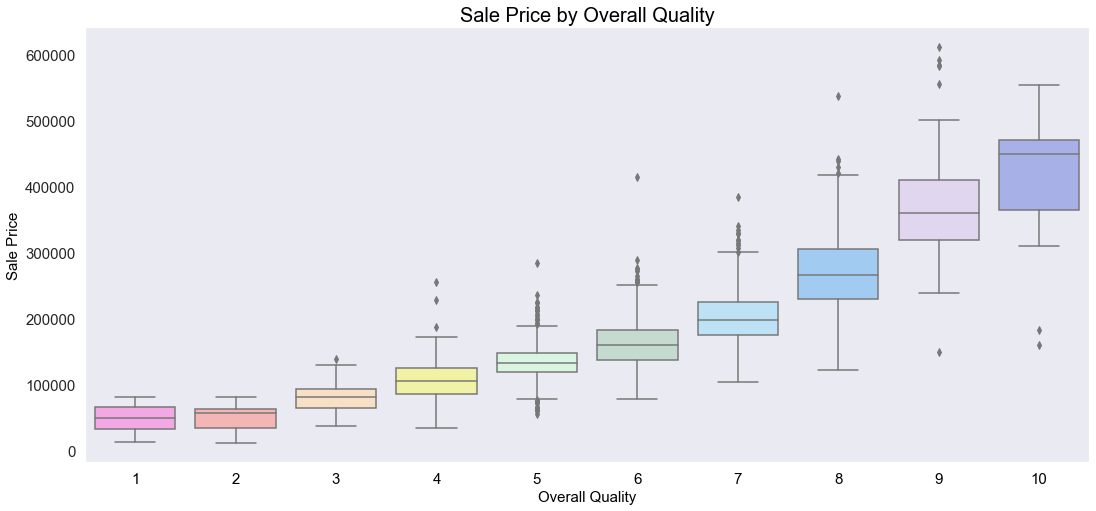

In [21]:
# indexes of Overall Quality sorted by mean Sale Price
sorted_index_qual = ames.groupby('Overall Qual')['SalePrice'].mean().sort_values().index

# create palatte for colors to be used in graph
palette = ['#FF9CEE', '#FFABAB','#FFE0BE', '#ffff99', '#D6F8E0', '#C2DFCF','#B4E5FF','#95CBFF',  '#DFD2F4', '#9CAAF2']

# boxplot of Sale Price grouped by Overall Quality
sns.set(style="dark",font_scale=1.0)
fig, ax = plt.subplots(figsize=(18, 8))
sns.boxplot(x='Overall Qual', y='SalePrice', data = ames, order=sorted_index_qual, ax=ax, palette = palette)
plt.title('Sale Price by Overall Quality', c='black', fontdict={'fontsize':20});
plt.xticks(fontsize= 15, c='black');
plt.xlabel('Overall Quality', fontsize= 15, c = 'black')
plt.ylabel('Sale Price', fontsize= 15, c='black');
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);

Another chart to demonstrate that as Overall Quality Increases, price increases as well. 

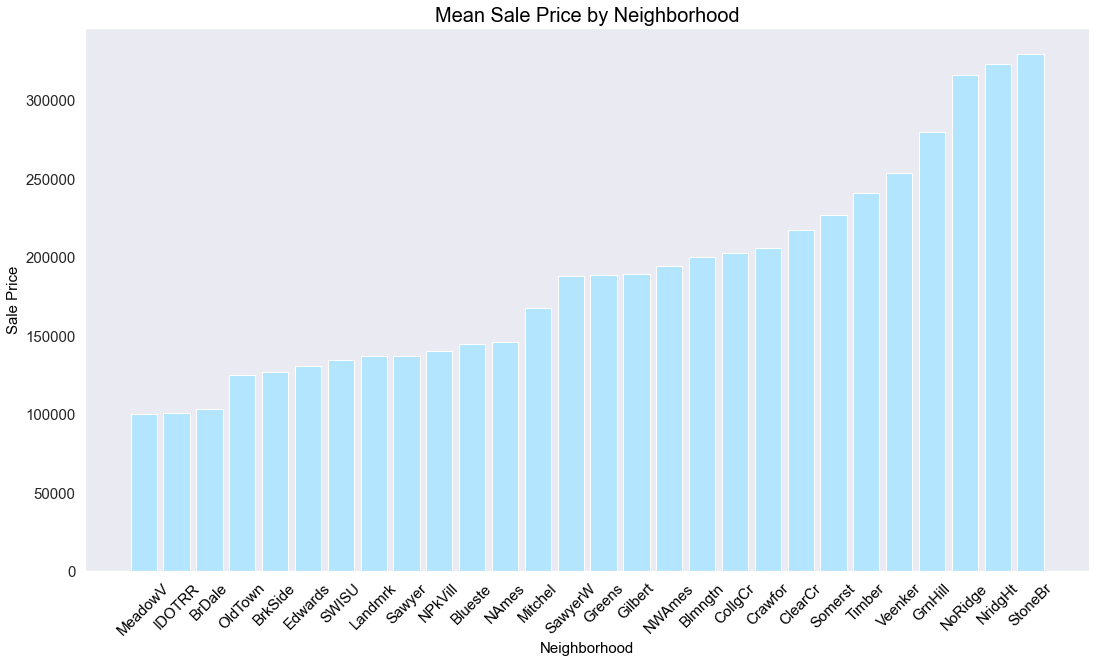

In [22]:
# citation: Intermediate Pandas Notebook

# bar plot of Mean Sale Price by Neighborhood
sns.set(style="dark",font_scale=1.0)
fig, ax = plt.subplots(figsize=(18, 10))
sorted_mean_price = ames.groupby('Neighborhood')['SalePrice'].mean().round().sort_values()
plt.bar(sorted_mean_price.index, sorted_mean_price, color='#B4E5FF')
plt.title('Mean Sale Price by Neighborhood', c='black', fontdict={'fontsize':20});
plt.xticks(rotation=45, fontsize= 15, c='black');
plt.xlabel('Neighborhood', fontsize= 15, c='black');
plt.ylabel('Sale Price', fontsize= 15, c='black');
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);

Again, this is another chart that exemplifies that the Neighborhood affects the Sale Price. This shows the same information the boxplot above does, however it does it in a more condensed manner. 

Analyze features least correlated with 'SalePrice':

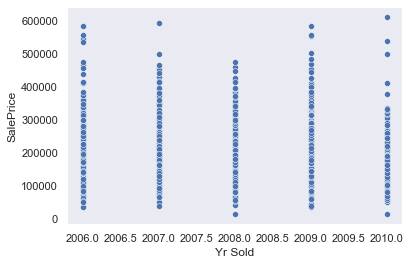

In [23]:
sns.scatterplot(data = ames, x = 'Yr Sold', y = 'SalePrice');

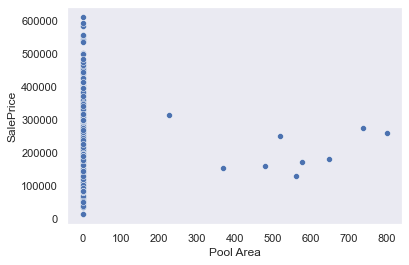

In [24]:
sns.scatterplot(data = ames, x = 'Pool Area', y = 'SalePrice');

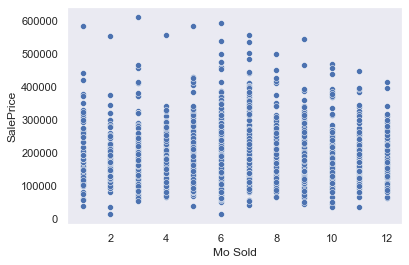

In [25]:
sns.scatterplot(data = ames, x = 'Mo Sold', y = 'SalePrice');

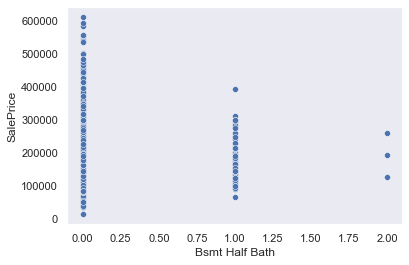

In [26]:
sns.scatterplot(data = ames, x = 'Bsmt Half Bath', y = 'SalePrice');

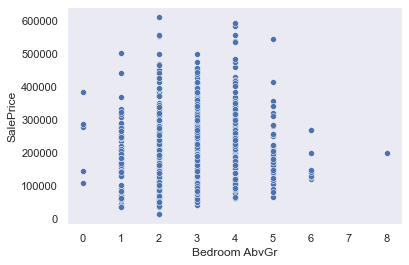

In [27]:
sns.scatterplot(data = ames, x = 'Bedroom AbvGr', y = 'SalePrice');

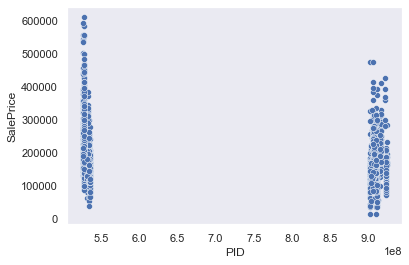

In [28]:
sns.scatterplot(data = ames, x = 'PID', y = 'SalePrice');

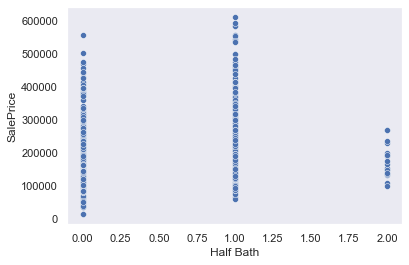

In [29]:
sns.scatterplot(data = ames, x = 'Half Bath', y = 'SalePrice');

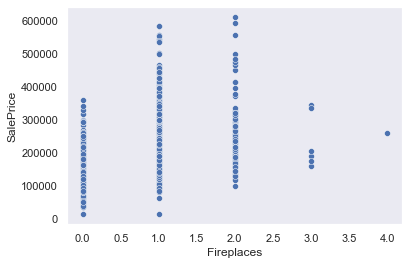

In [30]:
sns.scatterplot(data = ames, x = 'Fireplaces', y = 'SalePrice');

In [31]:
# sns.pairplot(ames)

## 4. Clean Data

#### a. Drop unneccessary columns

Drop features that have nothing/minimal correlation with sale price: 

In [32]:
ames.drop(columns = ['PID', 'Misc Val', 'Yr Sold'], inplace = True)

In [33]:
ames_test.drop(columns = ['PID', 'Misc Val', 'Yr Sold'], inplace = True)

As seen in the heatmap above, these features have little to no significance when determining the price.

#### b. Deal with NaN values

Change empty Garage Year Built's to the Year Built (year house was built):

In [34]:
ames['Garage Yr Blt'].fillna(ames['Year Built'], inplace=True)

In [35]:
ames_test['Garage Yr Blt'].fillna(ames['Year Built'], inplace=True)

Change empty Lot Frontage to Median of Lot Frontage in same Neighborhood:

In [36]:
# citation: List and Dicitonary Comps Notebook

# create dictionary with keys being neighborhood and values being mean of Lot Frontage for that Neighborhood
neigh_map = dict(ames.groupby('Neighborhood')['Lot Frontage'].median())

In [37]:
ames['Neighborhood'].fillna(neigh_map, inplace=True)

Change numerical features containing Nan to 0:

In [38]:
ames_n = ames.select_dtypes(exclude='object').replace(np.nan, 0)

In [39]:
ames_test_n = ames_test.select_dtypes(exclude='object').replace(np.nan, 0)

Change categorical features containing Nan to 'None':

In [40]:
ames_c = ames.select_dtypes(include='object').replace(np.nan, 'None')

In [41]:
ames_test_c = ames_test.select_dtypes(include='object').replace(np.nan, 'None')

Combine numerical and categorical dataframes together:

In [42]:
ames = pd.concat([ames_c, ames_n],axis=1)

In [43]:
ames_test = pd.concat([ames_test_c, ames_test_n],axis=1)

In [44]:
ames_test.shape

(878, 77)

In [45]:
# Test to make sure it worked:
ames.isna().sum()

MS Zoning          0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin Type 2     0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
Kitchen Qual       0
Functional         0
Fireplace Qu       0
Garage Type        0
Garage Finish      0
Garage Qual        0
Garage Cond        0
Paved Drive        0
Pool QC            0
Fence              0
Misc Feature       0
Sale Type          0
Id                 0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond 

#### c. Look for multicollinearity

Analyze relationship between "Total Bsmt SF" and "BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF":

/Users/olivialara/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


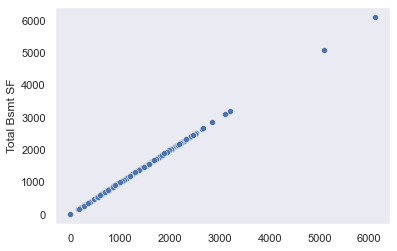

In [46]:
sns.scatterplot(ames['BsmtFin SF 1']+ames['BsmtFin SF 2']+ames['Bsmt Unf SF'],ames['Total Bsmt SF']);

Analyze relationship between "Gr Liv Area and "1st Flr SF", "2nd Flr", "Low Qual Fin SF":

/Users/olivialara/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Gr Liv Area'>

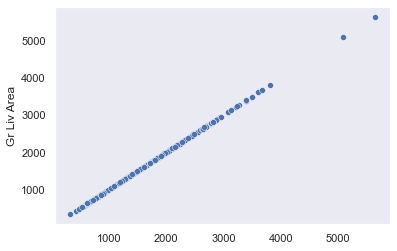

In [47]:
sns.scatterplot(ames['1st Flr SF']+ames['2nd Flr SF']+ames['Low Qual Fin SF'],ames['Gr Liv Area'])

Hopefully, by incorporating Standard Scaler, my model will still be accurate despite the multicollinearity in a few features as seen above.

#### d. Look for outliers in features that are highly correlated with price

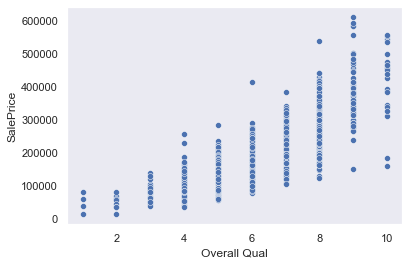

In [48]:
sns.scatterplot(data = ames, x = 'Overall Qual', y = 'SalePrice');

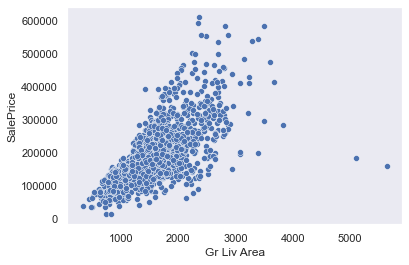

In [49]:
sns.scatterplot(data = ames, x = 'Gr Liv Area', y = 'SalePrice');

In [50]:
ames[ames['Gr Liv Area']>4000]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Mo Sold,SalePrice
960,RL,Pave,None,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,...,2.0,1418.0,214,292,0,0,0,480,1,160000
1885,RL,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,...,3.0,1154.0,546,484,0,0,0,0,10,183850


In [51]:
ames.drop(index=960, inplace =True)
ames.drop(index=1885, inplace =True)

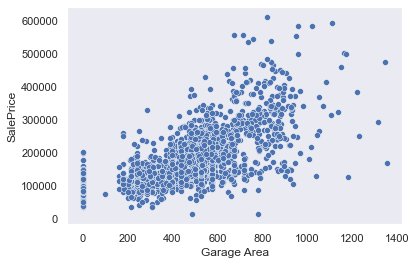

In [52]:
sns.scatterplot(data = ames, x = 'Garage Area', y = 'SalePrice');

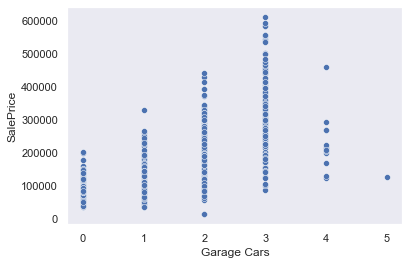

In [53]:
sns.scatterplot(data = ames, x = 'Garage Cars', y = 'SalePrice');

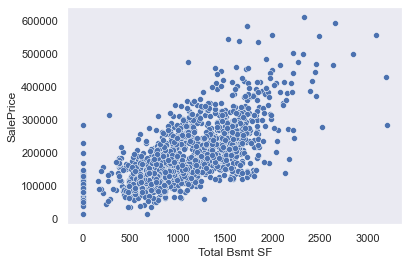

In [54]:
sns.scatterplot(data = ames, x = 'Total Bsmt SF', y = 'SalePrice');

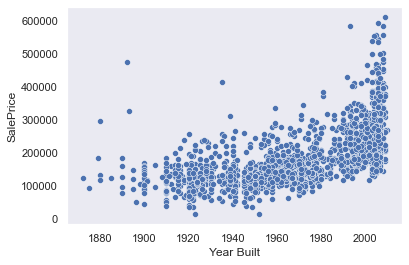

In [55]:
sns.scatterplot(data = ames, x = 'Year Built', y = 'SalePrice');

In [56]:
ames[(ames['Year Built']> 1870)&(ames['Year Built']<1900)&(ames['SalePrice']> 250_000)&(ames['SalePrice']< 500_000)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Mo Sold,SalePrice
1035,RM,Pave,None,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,3.0,840.0,0,260,0,0,410,0,6,475000
1141,RM,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,2.0,880.0,105,502,0,0,0,0,7,325000
1939,RM,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,3.0,870.0,302,0,0,0,0,0,5,295000


In [57]:
ames.drop(index=1035, inplace =True)

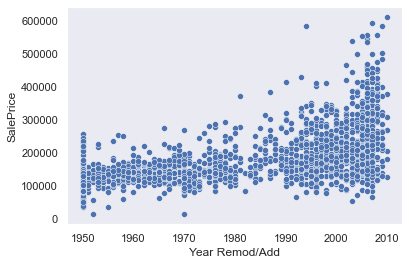

In [58]:
sns.scatterplot(data = ames, x = 'Year Remod/Add', y = 'SalePrice');

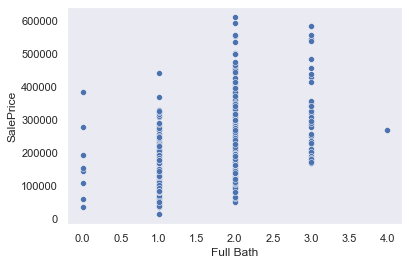

In [59]:
sns.scatterplot(data = ames, x = 'Full Bath', y = 'SalePrice');

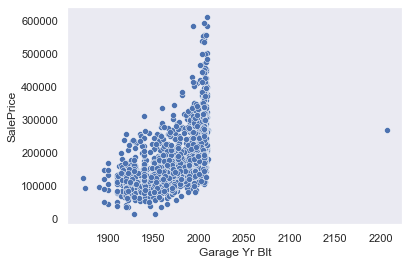

In [60]:
sns.scatterplot(data = ames, x = 'Garage Yr Blt', y = 'SalePrice');

In [61]:
ames[(ames['Garage Yr Blt']> 2150)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Mo Sold,SalePrice
1699,RL,Pave,None,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,...,2.0,502.0,132,0,0,0,0,0,9,267300


In [62]:
ames.loc[1699, 'Year Built']

2006

In [63]:
ames.loc[1699, 'Garage Yr Blt']= 2006

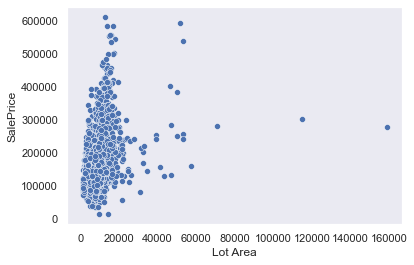

In [64]:
sns.scatterplot(data = ames, x = 'Lot Area', y = 'SalePrice');

In [65]:
ames[(ames['Lot Area']> 30_000)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Mo Sold,SalePrice
24,RL,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,Gilbert,Norm,...,2.0,572.0,264,0,0,0,0,0,1,145000
108,RL,Pave,None,IR1,Low,AllPub,CulDSac,Sev,NAmes,Norm,...,2.0,550.0,0,189,0,0,0,0,10,252000
337,RL,Pave,None,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,...,4.0,1356.0,439,0,0,0,0,0,3,168000
441,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,Norm,...,3.0,828.0,144,0,0,0,0,0,11,155000
471,RL,Pave,None,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,...,2.0,389.0,0,98,0,0,0,0,6,277000
616,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,2.0,624.0,0,372,0,0,0,0,7,284700
635,A (agr),Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,...,1.0,270.0,0,0,135,0,0,0,5,81500
694,RL,Pave,None,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,...,2.0,739.0,380,48,0,0,0,0,6,302000
745,RL,Pave,None,IR1,Bnk,AllPub,Inside,Sev,Timber,Norm,...,2.0,572.0,0,0,50,0,0,0,6,160000
823,RL,Pave,None,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,...,3.0,841.0,503,36,0,0,210,0,6,538000


In [66]:
# ames.drop(ames[(ames['Lot Area']> 30_000)], inplace =True)
ames.drop(index=24, inplace =True)
ames.drop(index=108, inplace =True)
ames.drop(index=337, inplace =True)
ames.drop(index=441, inplace =True)
ames.drop(index=471, inplace =True)
ames.drop(index=616, inplace =True)
ames.drop(index=635, inplace =True)
ames.drop(index=694, inplace =True)
ames.drop(index=745, inplace =True)
ames.drop(index=823, inplace =True)
ames.drop(index=841, inplace =True)
ames.drop(index=913, inplace =True)
ames.drop(index=1052, inplace =True)
ames.drop(index=1080, inplace =True)
ames.drop(index=1167, inplace =True)
ames.drop(index=1542, inplace =True)
ames.drop(index=1571, inplace =True)
ames.drop(index=1701, inplace =True)
ames.drop(index=1726, inplace =True)
ames.drop(index=1843, inplace =True)
ames.drop(index=1854, inplace =True)
ames.drop(index=1875, inplace =True)
ames.drop(index=1964, inplace =True)

By getting rid of outliers, the model won't account for unusual data/observations.

#### e. Replacing Nominal Categorical Data with Numbers

Create a dicitonary that replaces categorical data with numbers:

In [67]:
quality_map = {"None": 0, "Po": 1, "Fa": 2, "TA":3, "Gd":4, "Ex": 5}

In [68]:
ames["Garage Qual"] = ames["Garage Qual"].replace(quality_map)
ames["Exter Qual"] = ames["Exter Qual"].replace(quality_map)
ames["Kitchen Qual"] = ames["Kitchen Qual"].replace(quality_map)
ames["Fireplace Qu"] = ames["Fireplace Qu"].replace(quality_map)
ames["Heating QC"] = ames["Heating QC"].replace(quality_map)
ames["Exter Qual"] = ames["Heating QC"].replace(quality_map)

In [69]:
ames_test["Garage Qual"] = ames_test["Garage Qual"].replace(quality_map)
ames_test["Exter Qual"] = ames_test["Exter Qual"].replace(quality_map)
ames_test["Kitchen Qual"] = ames_test["Kitchen Qual"].replace(quality_map)
ames_test["Fireplace Qu"] = ames_test["Fireplace Qu"].replace(quality_map)
ames_test["Heating QC"] = ames_test["Heating QC"].replace(quality_map)
ames_test["Exter Qual"] = ames_test["Exter Qual"].replace(quality_map)

## 5. Feature Engineering

#### a. Adding More Features

In [70]:
ames['Age']=2011 - ames['Year Built']
ames['Remod Age']=2011 - ames['Year Remod/Add']
ames['Garage Age']=2011 - ames['Garage Yr Blt']
ames['Total Area'] = ames['Lot Area'] + ames['Mas Vnr Area'] + ames['Total Bsmt SF'] + ames['Gr Liv Area'] +ames['Garage Area'] +ames['Wood Deck SF']+ames['Open Porch SF']+ames['Enclosed Porch']+ames['Screen Porch']+ames['Pool Area']

In [71]:
ames_test['Age']=2011 - ames_test['Year Built']
ames_test['Remod Age']=2011 - ames_test['Year Remod/Add']
ames_test['Garage Age']=2011 - ames_test['Garage Yr Blt']
ames_test['Total Area'] = ames_test['Lot Area'] + ames_test['Mas Vnr Area'] + ames_test['Total Bsmt SF'] + ames_test['Gr Liv Area'] +ames_test['Garage Area'] +ames_test['Wood Deck SF']+ames_test['Open Porch SF']+ames_test['Enclosed Porch']+ames_test['Screen Porch']+ames_test['Pool Area']

#### b. Interaction Feature Engineering

In [72]:
ames['OverallQual & GrLivArea'] = ames['Overall Qual'] * ames['Gr Liv Area']
ames['GarageArea & Cars'] = ames['Garage Area'] * ames['Garage Cars']
ames['Age & RemodAge'] = ames['Age'] * ames['Remod Age']
ames['FullBath & RmsAbvGrd'] = ames['Full Bath'] * ames['TotRms AbvGrd']

In [73]:
ames_test['OverallQual & GrLivArea'] = ames_test['Overall Qual'] * ames_test['Gr Liv Area']
ames_test['GarageArea & Cars'] = ames_test['Garage Area'] * ames_test['Garage Cars']
ames_test['Age & RemodAge'] = ames_test['Age'] * ames_test['Remod Age']
ames_test['FullBath & RmsAbvGrd'] = ames_test['Full Bath'] * ames_test['TotRms AbvGrd']

After applying what I know about the housing market and testing various combinations of interactions and new features, it appears that the features above improve my model the most. I assume that this is due to the fact that these features add more meaning to our observations, allowing us to create a more effective model.

Get rid of features that feature engineering already takes care of:

In [74]:
ames.drop(columns = ['Year Built', 'Year Remod/Add','Garage Yr Blt'], inplace=True)

In [75]:
ames_test.drop(columns= ['Year Built', 'Year Remod/Add','Garage Yr Blt'], inplace=True)

## 6. Save Cleaned Data

In [76]:
ames.to_csv('../datasets/train_clean.csv', index=False)
ames_test.to_csv('../datasets/test_clean.csv', index=False)

## 7. Modeling

#### a. Crate X and y

In [304]:
X = ames.drop(columns = 'SalePrice')
y = ames['SalePrice']

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [89]:
X.shape

(2025, 82)

In [90]:
X.columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Id', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
  

In [84]:
sklearn.set_config(display = 'diagram') 

#### b. Model with Standard Scaler and Ridge with OHE:

In [306]:
params = {
    'ridge__alpha' : [.01, .1, 1, 10, 100],
}

In [307]:
ct1 = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore', sparse=False), make_column_selector(dtype_include = object)), 
    remainder = 'passthrough'
)

ct1

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb02479c670>)])

In [308]:
pipe = make_pipeline(ct1,StandardScaler(),Ridge())

*Note*: I did try to integrate polynomial features in the pipelines above, but whenever I did it would not work and my kernal would shut down.

In [309]:
gs = GridSearchCV(pipe, params, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb02479c670>)])),
                                       ('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1, param_grid={'ridge__alpha': [0.01, 0.1, 1, 10, 100]})

In [310]:
gs.score(X_train, y_train)

0.9411503262143593

In [311]:
gs.score(X_test, y_test)

0.9295668401111277

In [314]:
mean_squared_error(y_test, gs.predict(X_test), squared=False)

20704.508423247422

Based on the R2 score, this model explains about 94% of the variance in sales price for the training data.

Based on the R2 score, this model explains about 93% of the variance in sales price for the testing data.

The Root Mean Squared Error is 20704.

#### c. Model with Standard Scaler and Lasso with OHE:

In [315]:
params = {
    'lasso__alpha' : [.01, .1, 1, 10, 100],
}

In [316]:
pipe = make_pipeline(ct1,StandardScaler(),Lasso())

*Note*: I did try to integrate polynomial features in the pipelines above, but whenever I did it would not work and my kernal would shut down.

In [317]:
gs = GridSearchCV(pipe, params, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb02479c670>)])),
                                       ('standardscaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=-1, param_grid={'lasso__alpha': [0.01, 0.1, 1, 10, 100]})

In [318]:
gs.score(X_train, y_train)

0.9439418430474992

In [319]:
gs.score(X_test, y_test)

0.9371223968675004

In [320]:
mean_squared_error(y_test, gs.predict(X_test), squared=False)

19562.49871686876

Based on the R2 score, this model explains about 94% of the variance in sales price for the training data.

Based on the R2 score, this model explains about 94% of the variance in sales price for the testing data.

The Root Mean Squared Error is 19562.

#### d. Categorical Column Transformation with Dummies

Convert categorical variables into dummy/indicator variables:

In [261]:
# citation: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
X_dummies = pd.get_dummies(X, drop_first=True)
X_test_data = ames_test

In [262]:
X_test_data_dummies = pd.get_dummies(X_test_data, drop_first=True)

Grab features that are in both the training and testing data sets:

In [263]:
# citation: https://numpy.org/doc/stable/reference/generated/numpy.intersect1d.html

X_dummies = X_dummies[np.intersect1d(X_dummies.columns, X_test_data_dummies.columns)]

In [264]:
X_test_data_dummies = X_test_data_dummies[np.intersect1d(X_dummies.columns, X_test_data_dummies.columns)]

In [265]:
X_dummies.shape

(2025, 224)

In [266]:
X_dummies.columns

Index(['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Age', 'Age & RemodAge',
       'Alley_None', 'Alley_Pave', 'Bedroom AbvGr', 'Bldg Type_2fmCon',
       'Bldg Type_Duplex',
       ...
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD ', 'Screen Porch',
       'Street_Pave', 'TotRms AbvGrd', 'Total Area', 'Total Bsmt SF',
       'Utilities_NoSewr', 'Wood Deck SF'],
      dtype='object', length=224)

The step above is neccessary because I was thrown the error 'X has 233 features, but StandardScaler is expecting 247 features as input' when I would try to run the following cell: 

ames_test['SalePrice'] = gs.predict(X_test_data_dummies)

#### e. Model with Standard Scaler and Ridge with Dummies

In [277]:
params = {
    'ridge__alpha' : [.01, .1, 1, 10, 100],
}

In [278]:
pipe = make_pipeline(StandardScaler(),Ridge())


In [279]:
gs = GridSearchCV(pipe, params, n_jobs=-1)
gs.fit(X_dummies, y)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1, param_grid={'ridge__alpha': [0.01, 0.1, 1, 10, 100]})

In [280]:
gs.score(X_dummies, y)

0.9444097709133411

In [281]:
y_preds = gs.predict(X_dummies)

In [282]:
mean_squared_error(y, y_preds,  squared=False)

18388.16764276818

Based on the R2 score, this model explains about 94% of the variance in sales price for the training data.

The Root Mean Squared Error is 18388.

Analyze coefficients of Ridge Model:

In [283]:
gs.best_estimator_.named_steps['ridge'].coef_

array([ 1.33322638e+03, -2.09150454e+03,  4.86705477e+02, -9.10715708e+03,
        1.24121821e+03, -1.50420886e+02, -1.21496252e+03, -2.45925165e+03,
       -1.65293035e+02, -2.12787592e+03, -2.50215524e+03, -1.86250213e+03,
        2.52149881e+02,  1.05835520e+03, -1.22615865e+02,  3.31602385e+03,
       -1.09909771e+03, -1.26437488e+03, -6.50805675e+02,  1.01377494e+03,
       -2.30577305e+02, -1.61752636e+03, -8.73348669e+03,  1.05835520e+03,
       -2.51749844e+02, -6.74610575e+03, -9.99764499e+02,  8.04827409e+03,
        1.20128115e+03, -4.48394501e+02,  1.43333732e+03, -7.69494758e+02,
        1.05835520e+03, -6.60818745e+02,  1.44983716e+03, -1.49902383e+03,
        6.84660220e+02, -1.99599922e+03, -3.60423209e+03, -1.81244054e+03,
       -2.27181850e+03, -4.21771111e+02,  1.71917994e+03,  3.70846110e+03,
        1.46191503e+03,  1.85489438e+03, -3.89082623e+02,  2.30116547e+02,
        7.64110554e+01, -1.75999603e+02,  5.01842657e+02,  9.32693134e+02,
       -1.80644196e+02,  

In [284]:
pd.DataFrame(zip(X_dummies.columns, gs.best_estimator_.named_steps['ridge'].coef_)).sort_values

<bound method DataFrame.sort_values of                            0             1
0                 1st Flr SF   1333.226378
1                 2nd Flr SF  -2091.504539
2                 3Ssn Porch    486.705477
3                        Age  -9107.157081
4             Age & RemodAge   1241.218214
5                 Alley_None   -150.420886
6                 Alley_Pave  -1214.962519
7              Bedroom AbvGr  -2459.251651
8           Bldg Type_2fmCon   -165.293035
9           Bldg Type_Duplex  -2127.875922
10           Bldg Type_Twnhs  -2502.155239
11          Bldg Type_TwnhsE  -1862.502128
12              Bsmt Cond_Gd    252.149881
13            Bsmt Cond_None   1058.355200
14              Bsmt Cond_TA   -122.615865
15          Bsmt Exposure_Gd   3316.023850
16          Bsmt Exposure_Mn  -1099.097709
17          Bsmt Exposure_No  -1264.374884
18        Bsmt Exposure_None   -650.805675
19            Bsmt Full Bath   1013.774941
20            Bsmt Half Bath   -230.577305
21             

In [246]:
# citation: Grid Search Notebook
# citation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

# creates dataframe with top 10 positive coefficients for ridge, with names of coefficients in one column and values of coefficients in the other
coefs_top = pd.DataFrame(zip(X_dummies.columns, gs.best_estimator_.named_steps['ridge'].coef_)).sort_values(by=1, ascending=False).head(10)
coefs_top.set_index(0, inplace = True)

# transforms dataframe above to series
coefs_top_series = coefs_top.iloc[:, 0]

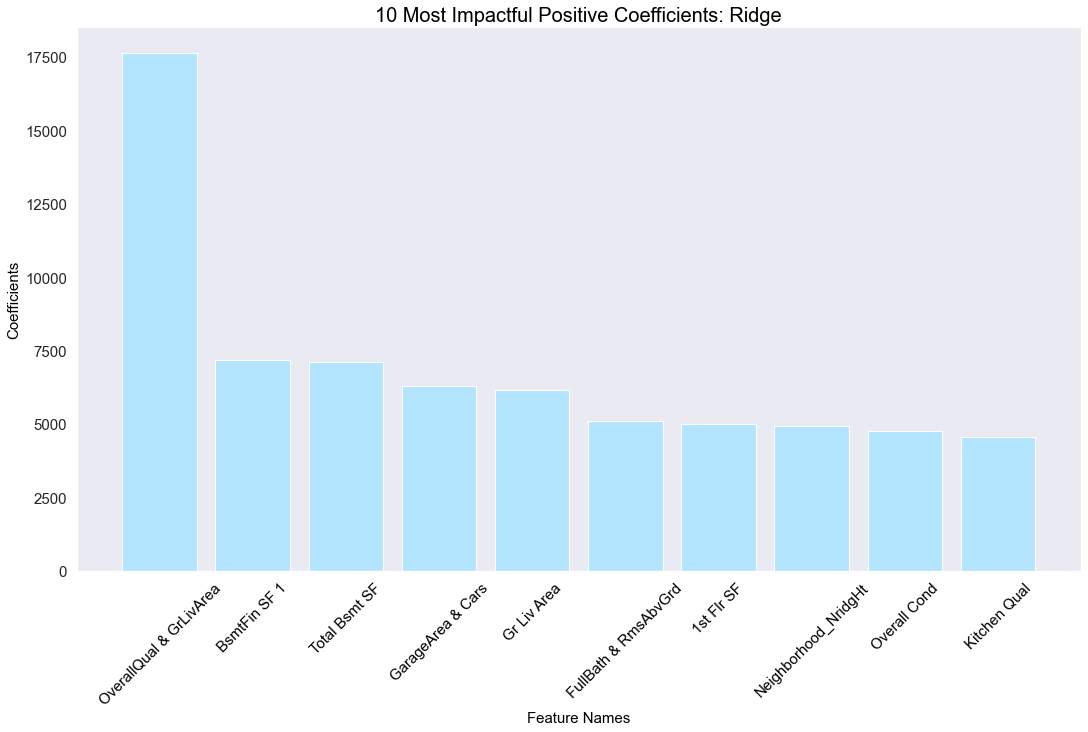

In [245]:
# bar chart of top 10 positive coefficients for ridge
sns.set(style="dark",font_scale=1.0)
fig, ax = plt.subplots(figsize=(18, 10))
plt.bar(coefs_top_series.index, coefs_top_series, color='#B4E5FF')
plt.title('10 Most Impactful Positive Coefficients: Ridge', c='black', fontdict={'fontsize':20});
plt.xticks(rotation=45, fontsize= 15, c='black');
plt.xlabel('Feature Names', fontsize= 15, c='black');
plt.ylabel('Coefficients', fontsize= 15, c='black');
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);

In [247]:
# creates dataframe with top 10 negative coefficients for ridge, with names of coefficients in one column and values of coefficients in the other
coefs_bottom= pd.DataFrame(zip(X_dummies.columns, gs.best_estimator_.named_steps['ridge'].coef_)).sort_values(by=1, ascending=True).head(10)
coefs_bottom.set_index(0, inplace = True)

# transforms dataframe above to series
coefs_bottom_series = coefs_bottom.iloc[:, 0]

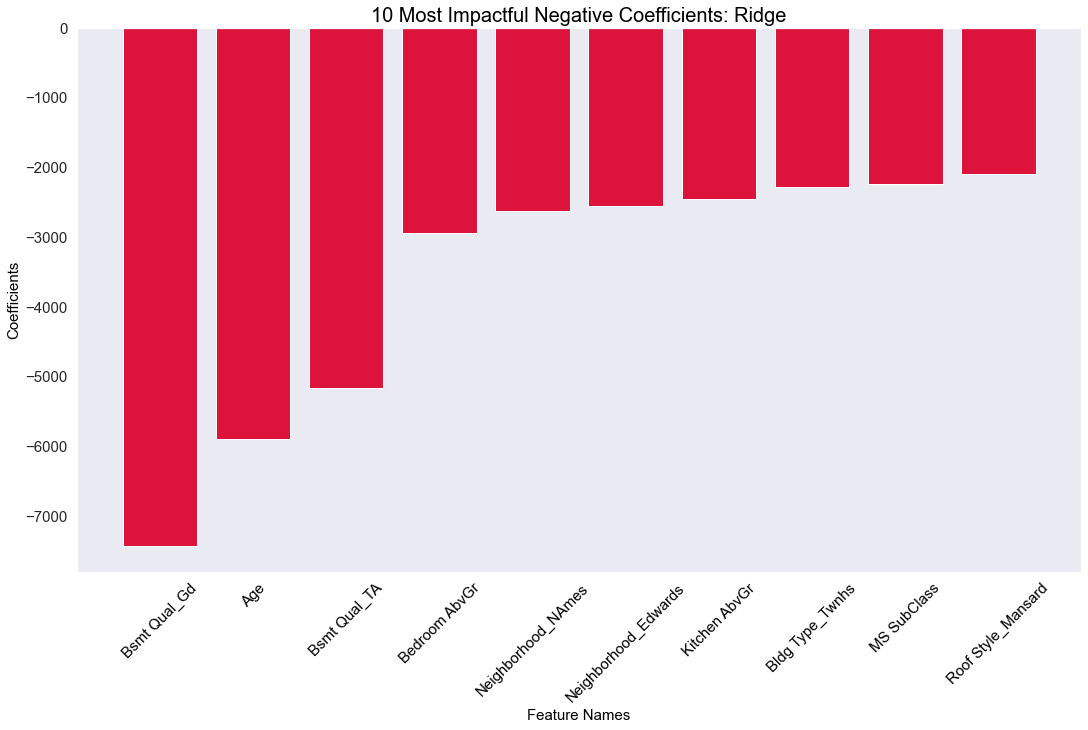

In [248]:
# bar chart of top 10 negative coefficients for ridge
sns.set(style="dark",font_scale=1.0)
fig, ax = plt.subplots(figsize=(18, 10))
plt.bar(coefs_bottom_series.index, coefs_bottom_series, color='crimson')
plt.title('10 Most Impactful Negative Coefficients: Ridge', c='black', fontdict={'fontsize':20});
plt.xticks(rotation=45, fontsize= 15, c='black');
plt.xlabel('Feature Names', fontsize= 15, c='black');
plt.ylabel('Coefficients', fontsize= 15, c='black');
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);

#### f. Model with Standard Scaler and Lasso with Dummies

In [323]:
params = {
    'lasso__alpha' : [.01, .1, 1, 10, 100],
}

In [324]:
pipe = make_pipeline(StandardScaler(),Lasso())

In [325]:
gs = GridSearchCV(pipe, params, n_jobs=-1)
gs.fit(X_dummies, y)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=-1, param_grid={'lasso__alpha': [0.01, 0.1, 1, 10, 100]})

In [326]:
gs.score(X_dummies, y)

0.9427988495294216

In [327]:
y_preds = gs.predict(X_dummies)

In [328]:
mean_squared_error(y, y_preds,  squared=False)

18652.695669045854

Based on the R2 score, this model explains about 94% of the variance in sales price for the training data.

The Root Mean Squared Error is 18652.

In [273]:
gs.best_params_

{'lasso__alpha': 100}

In [274]:
gs.best_estimator_.named_steps

{'standardscaler': StandardScaler(), 'lasso': Lasso(alpha=100)}

Since this is the best performing model I will submit this one to Kaggle:

In [1]:
# comment out since it is already there

# ames_test['SalePrice'] = gs.predict(X_test_data_dummies)
# submission = ames_test[['Id', 'SalePrice']]
# submission.set_index('Id', inplace = True)
# submission.to_csv('final_submission.csv')

Analyze coefficients of Lasso Model:

In [330]:
gs.best_estimator_.named_steps['lasso'].coef_

array([-0.00000000e+00, -2.26130956e+03,  2.01619217e+02, -8.89528592e+03,
       -0.00000000e+00, -0.00000000e+00, -1.11495523e+03, -2.61006970e+03,
        0.00000000e+00, -1.94738079e+03, -2.05436762e+03, -1.33505693e+03,
        1.97887087e+02, -0.00000000e+00, -0.00000000e+00,  3.48398129e+03,
       -1.04949004e+03, -1.36743765e+03, -0.00000000e+00,  1.16154512e+03,
       -1.27040150e+02, -1.24614463e+03, -8.32328857e+03, -0.00000000e+00,
       -1.33548560e+02, -6.05893393e+03, -0.00000000e+00,  8.52982373e+03,
        1.47730680e+03, -2.64407288e+02,  1.32378056e+03, -5.52270939e+02,
       -0.00000000e+00, -4.09400563e+02,  9.90915969e+02, -6.24386230e+02,
        8.87790228e+02, -1.01219367e+03, -1.20566155e+02, -7.92822775e+02,
       -4.32916689e+02, -0.00000000e+00,  9.43271367e+02,  2.97672971e+03,
        1.21930379e+03,  1.48578896e+03, -5.18081622e+02, -0.00000000e+00,
       -0.00000000e+00, -2.68493353e+02,  2.56622758e+02,  7.65693755e+02,
       -0.00000000e+00,  

In [331]:
pd.DataFrame(zip(X_dummies.columns, gs.best_estimator_.named_steps['lasso'].coef_)).sort_values

<bound method DataFrame.sort_values of                            0             1
0                 1st Flr SF     -0.000000
1                 2nd Flr SF  -2261.309564
2                 3Ssn Porch    201.619217
3                        Age  -8895.285924
4             Age & RemodAge     -0.000000
5                 Alley_None     -0.000000
6                 Alley_Pave  -1114.955234
7              Bedroom AbvGr  -2610.069697
8           Bldg Type_2fmCon      0.000000
9           Bldg Type_Duplex  -1947.380790
10           Bldg Type_Twnhs  -2054.367619
11          Bldg Type_TwnhsE  -1335.056929
12              Bsmt Cond_Gd    197.887087
13            Bsmt Cond_None     -0.000000
14              Bsmt Cond_TA     -0.000000
15          Bsmt Exposure_Gd   3483.981295
16          Bsmt Exposure_Mn  -1049.490044
17          Bsmt Exposure_No  -1367.437653
18        Bsmt Exposure_None     -0.000000
19            Bsmt Full Bath   1161.545121
20            Bsmt Half Bath   -127.040150
21             

In [332]:
# creates dataframe with top 10 positive coefficients for lasso, with names of coefficients in one column and values of coefficients in the other
coefs_top = pd.DataFrame(zip(X_dummies.columns, gs.best_estimator_.named_steps['lasso'].coef_)).sort_values(by=1, ascending=False).head(10)
coefs_top.set_index(0, inplace = True)

# transforms dataframe above to series
coefs_top_series = coefs_top.iloc[:, 0]

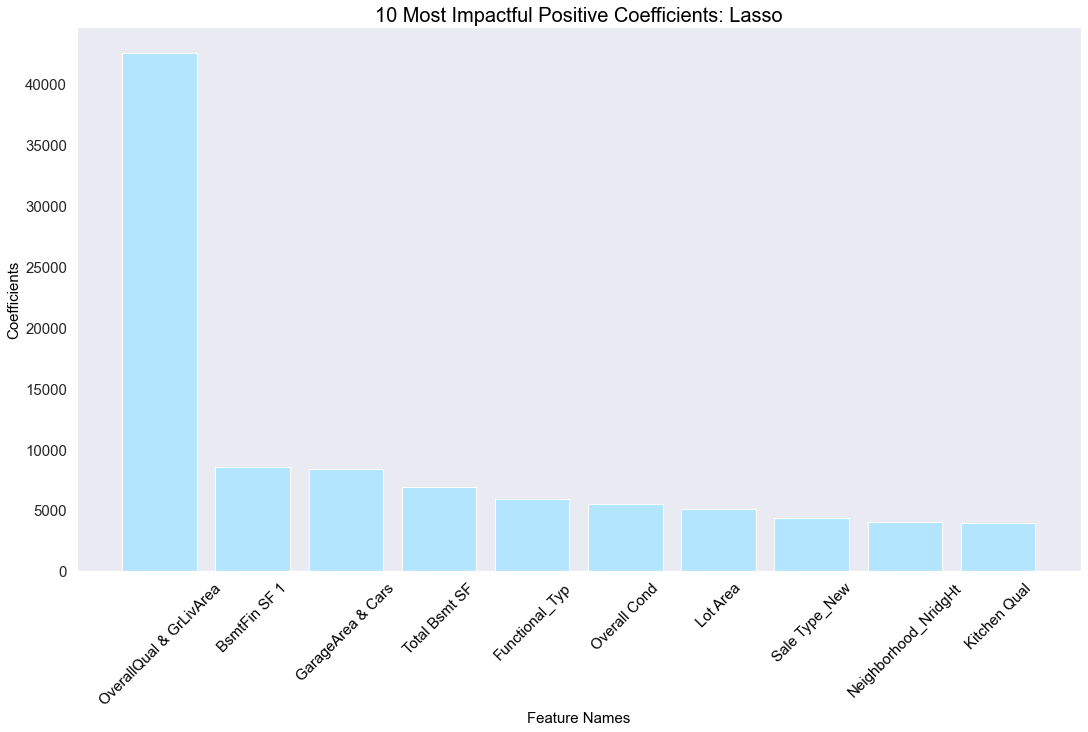

In [333]:
# bar chart of top 10 positive coefficients for lasso
sns.set(style="dark",font_scale=1.0)
fig, ax = plt.subplots(figsize=(18, 10))
plt.bar(coefs_top_series.index, coefs_top_series, color='#B4E5FF')
plt.title('10 Most Impactful Positive Coefficients: Lasso', c='black', fontdict={'fontsize':20});
plt.xticks(rotation=45, fontsize= 15, c='black');
plt.xlabel('Feature Names', fontsize= 15, c='black');
plt.ylabel('Coefficients', fontsize= 15, c='black');
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);

In [334]:
# creates dataframe with top 10 negative coefficients for lasso, with names of coefficients in one column and values of coefficients in the other
coefs_bottom= pd.DataFrame(zip(X_dummies.columns, gs.best_estimator_.named_steps['lasso'].coef_)).sort_values(by=1, ascending=True).head(10)
coefs_bottom.set_index(0, inplace = True)

coefs_bottom_series = coefs_bottom.iloc[:, 0]

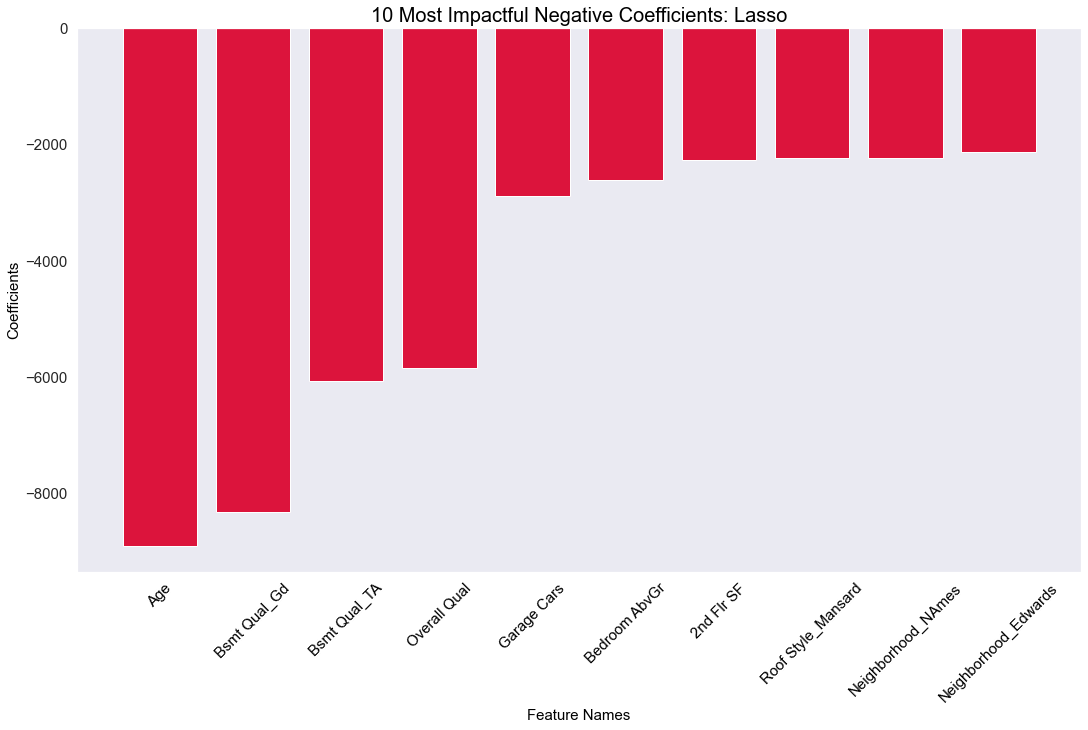

/Users/olivialara/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242393559552.77563, tolerance: 959301582.3938695
  model = cd_fast.enet_coordinate_descent(
/Users/olivialara/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242393559552.77563, tolerance: 959301582.3938695
  model = cd_fast.enet_coordinate_descent(
/Users/olivialara/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3891133164.9335327, tolerance: 959301582.3938695
  model = cd_fast.enet_coordinate_descent(
/Users/olivialara/opt/anaconda3/lib/python3.8/site-pack

In [335]:
# bar chart of top 10 negative coefficients for lasso
sns.set(style="dark",font_scale=1.0)
fig, ax = plt.subplots(figsize=(18, 10))
plt.bar(coefs_bottom_series.index, coefs_bottom_series, color='crimson')
plt.title('10 Most Impactful Negative Coefficients: Lasso', c='black', fontdict={'fontsize':20});
plt.xticks(rotation=45, fontsize= 15, c='black');
plt.xlabel('Feature Names', fontsize= 15, c='black');
plt.ylabel('Coefficients', fontsize= 15, c='black');
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);

Interpretation of coefficients: 

OverallQual & GrLivArea has the greatest positive coefficient. As the value of Overall Quality and Ground Living Area increase, the price of the home will increase as well. All other things held equal, the price increases by $40,000 for every one standard deviation increase in OverallQual & GrLivArea. 

In contrast, age has the greatest negative coefficient. As the value of Age increases, the price of the home will decrease. All other things held equal, the price decreases by $8,000 for every one standard deviation increase in Age. 



## 8. Conclusion

After submitting all the models above to Kaggle the model that performed the best was the Lasso Regression with Dummies.

Again, this model had the following performance: 

Based on the R2 score, this model explains about 94% of the variance in sales price for the training data.

The Root Mean Squared Error is 18652.